In [19]:
using LinearAlgebra
include("matrix_utils.jl")

my_inv (generic function with 1 method)

In [87]:
function lu_factorization(A)
    len = size(A, 1)
    L = zeros(len, len)
    U = zeros(len, len)
    lu_factorization_(A, L, U)
    return L, U
end


function lu_factorization_(A, L, U)
    if size(A, 1) == 2
        l, u = lu(A, NoPivot())
        L[:, :] = l
        U[:, :] = u
        return
    end
    len = (size(A, 1) ÷ 2)
    a11 = [1:len, 1:len]
    a12 = [1:len, len+1:len*2]
    a21 = [len+1:len*2, 1:len]
    a22 = [len+1:len*2, len+1:len*2]

    L11, U11 = lu_factorization(A[a11...])
    inv_U11 = my_inv(U11)
    inv_L11 = my_inv(L11)

    L21 = multiply_rec(A[a21...], inv_U11)
    U12 = multiply_rec(inv_L11, A[a12...])
    S = A[a22...] - multiply_rec(
        A[a21...], 
        multiply_rec(
            inv_U11, 
            multiply_rec(
                inv_L11,
                A[a12...]
            )
        )
    )
    L22, U22 = lu_factorization(S)

    L[a11...] = L11
    L[a21...] = L21
    L[a22...] = L22
    U[a11...] = U11
    U[a12...] = U12
    U[a22...] = U22
end

lu_factorization_ (generic function with 1 method)

In [88]:
function test_lu(N)
    for n in 1:N
        A = rand(2^n, 2^n)
        L, U = lu_factorization(A)
        if isapprox(A, L * U)
            println("Test passed for matrix of size ", 2^n, "x", 2^n)
        else
            println("Test failed for matrix of size ", 2^n, "x", 2^n)
        end
    end
end

test_lu(9)

Test passed for matrix of size 2x2
Test passed for matrix of size 4x4
Test passed for matrix of size 8x8
Test passed for matrix of size 16x16
Test passed for matrix of size 32x32
Test passed for matrix of size 64x64


Test passed for matrix of size 128x128
Test passed for matrix of size 

256x256


Test passed for matrix of size 512x512


In [ ]:
import Pkg; Pkg.add("PlotlyJS")

In [101]:
function lu_det(A)
    L, U = lu_factorization(A)
    det = 1
    for i in 1:size(A, 1)
        det *= L[i, i] * U[i, i]
    end
    return det
end

lu_dets = []
true_dets = []

N = 9
for n in 1:N
    A = rand(2^n, 2^n)
    push!(lu_dets, lu_det(A))
    push!(true_dets, det(A))
end


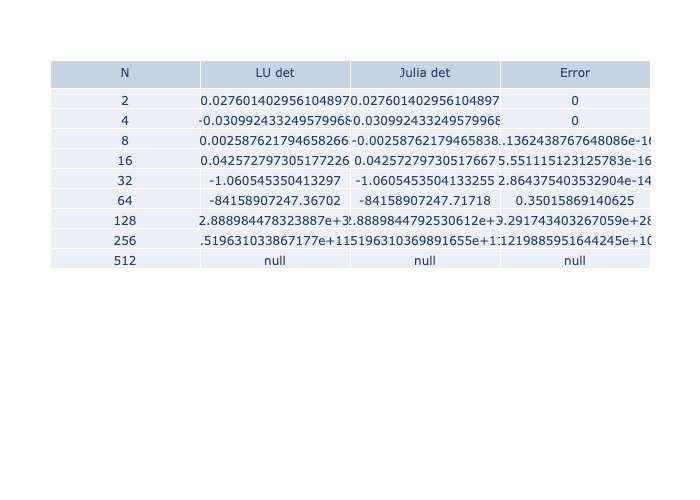

In [102]:
using PlotlyJS

plot(
    table(
        header_values=["N", "LU det", "Julia det", "Error"],
        cells_values=[
            2 .^ (1:N),
            lu_dets,
            true_dets,
            abs.(lu_dets .- true_dets)
        ]
    )
)


In [103]:
function test_time_lu(n)
    times = zeros(n)
    flops = zeros(n)
    for i in 1:n
        A = rand(2^i, 2^i)
        global FLOPS = 0
        times[i] = @elapsed lu_factorization(A)
        flops[i] = FLOPS
        println("n=$i, time=$(times[i]), flops=$(flops[i])")
    end
    return times, flops
end

times, flops = test_time_lu(9)

n=1, time=4.917e-6, flops=0.0
n=2, time=4.1458e-5, flops=56.0
n=3, time=5.8333e-5, flops=628.0
n=4, time=0.000329167, flops=5492.0
n=5, time=0.002685042, flops=45060.0
n=6, time=0.02098525, flops=363076.0


n=7, time=0.19939775, flops=2.910468e6


n=8, time=1.535354875, flops=2.3296772e7


n=9, time=11.452094875, flops=1.8640282e8


([4.917e-6, 4.1458e-5, 5.8333e-5, 0.000329167, 0.002685042, 0.02098525, 0.19939775, 1.535354875, 11.452094875], [0.0, 56.0, 628.0, 5492.0, 45060.0, 363076.0, 2.910468e6, 2.3296772e7, 1.8640282e8])

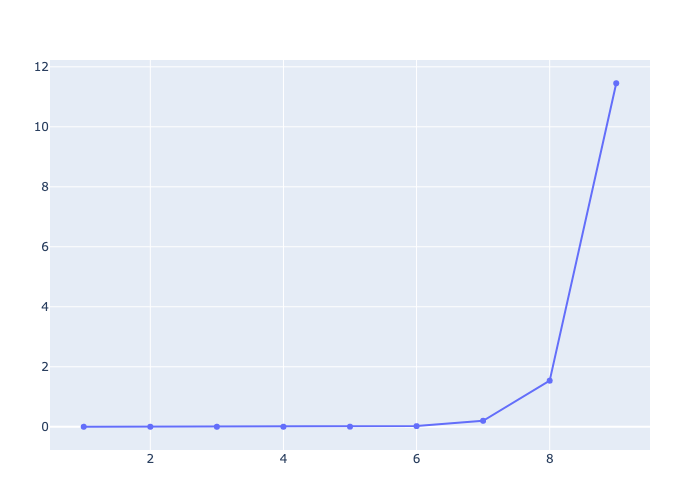

In [104]:
plot(times, label="time", xlabel="log2(n)", ylabel="time (s)")


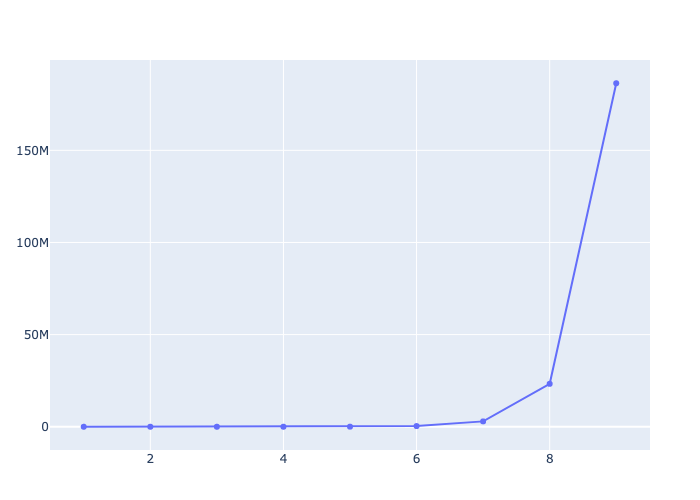

In [105]:
plot(flops, label="flops", xlabel="log2(n)", ylabel="flops")